In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [2]:
training_df = pd.read_csv('~/train.csv', error_bad_lines=False)

In [3]:
training_df.shape

(404290, 6)

In [3]:
test_df = pd.read_csv('~/test.csv')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
test_df.shape

(3563475, 3)

In [7]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
y =training_df['is_duplicate']

In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [5]:
training_df =training_df.drop(columns=['is_duplicate'])

In [6]:
temp_check = pd.concat([training_df[['question1','question2']], test_df[['question1','question2']]])

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import *
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
sw_dict={}
    
for i in stopwords.words('english'):
    sw_dict[i]=1
    



In [9]:
import re
from nltk.stem import WordNetLemmatizer
#from nltk.stem import PorterStemmer
from stemming.porter2 import stem

lemi_words=[]
stem_words=[]
lmtzr = nltk.WordNetLemmatizer().lemmatize
ps = PorterStemmer()



def do_lemitise(word):
    old_word=word
    word = lmtzr(word)
    if word != old_word:
        lemi_words.append((old_word, word))
        
    return word
    
def do_stem(word):
    old_word=word
    word = stem(word)
    if word != old_word:
        stem_words.append((old_word, word))
    return word
        

def do_process_word(word):
    word = do_stem(word)
    word = do_lemitise(word)
    return word
    
    
    

def corpus_filteration(dfList):
    
    actual_list =[]
    

    
    item_num=0

    for k, v in dfList.iteritems():
        questions_corpus = re.sub('[^a-zA-Z]',' ', str(v)).lower().split()
        questions_corpus = [do_process_word(word) for word in questions_corpus if word not in sw_dict.keys()]
        
        actual_list.append(questions_corpus)
        item_num = item_num + 1
        if (item_num%1000000 == 0):
            print ("Done so far {} ".format(item_num) )
    
    return actual_list           
    
    

In [10]:
training_error1_cf = corpus_filteration(training_df['question1'])

In [11]:
training_error2_cf = corpus_filteration(training_df['question2'])

In [12]:
test_question_list= corpus_filteration(temp_check['question1']) + corpus_filteration(temp_check['question2'])

Done so far 1000000 
Done so far 2000000 
Done so far 3000000 
Done so far 1000000 
Done so far 2000000 
Done so far 3000000 


In [ ]:
type(test_question_list[0][0])

In [ ]:
new_file=open("test_question_list.txt",mode="a")


for i in test_question_list:
    new_file.writelines(i)
new_file.close()

'step'

In [13]:
from gensim.models import Word2Vec
model = Word2Vec(test_question_list, min_count=1,size=50)



words = list(model.wv.vocab)

model.save('model.bin')


In [12]:

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

word2vec_model = KeyedVectors.load('model.bin')
word2vec_model.init_sims(replace=True)


In [ ]:
print(type(word2vec_model))


In [15]:
from pyemd import emd
def distance_calculation(d1,d2):
        i=j=0
        distance_list=[]
        len_train_01 =len(d1)
        len_train_02 =len(d2)
        item_num=0
        
        
        while (i<len_train_01 and j<len_train_02):
            distance_questions = word2vec_model.wv.wmdistance(d1[i], d2[j])
            #f.write(str(distance_questions))
            distance_list.append(distance_questions)
            i=i+1
            j=j+1
            item_num = item_num + 1
            if (item_num%100000 == 0):
                print ("Done so far {} ".format(item_num) )
        training_df['is_duplicate_01']=distance_list
        return training_df['is_duplicate_01']
        #return distance_list

In [16]:
distance_calculation(training_error1_cf,training_error2_cf)

Done so far 100000 
Done so far 200000 
Done so far 300000 
Done so far 400000 


0         0.182588
1         0.794831
2         0.522713
3         1.230278
4         0.934650
5         0.602225
6         1.343568
7         0.457476
8         0.000000
9         0.643127
10        1.200547
11        0.563762
12        0.000000
13        0.305871
14        0.085295
15        0.769805
16        0.000000
17        0.408174
18        0.575044
19        0.120852
20        0.663469
21        0.300835
22        0.000000
23        1.317550
24        0.769116
25        0.199825
26        0.318798
27        0.769089
28        0.250733
29        0.653618
            ...   
404260    0.574573
404261    0.297097
404262    0.285560
404263    0.558133
404264    0.819386
404265    0.381791
404266    0.938127
404267    0.427773
404268    0.924855
404269    0.490077
404270    0.000000
404271    0.811712
404272    0.709233
404273    0.508930
404274    0.493883
404275    0.694403
404276    0.147626
404277    1.004356
404278    0.506764
404279    0.846021
404280    0.205289
404281    0.

In [ ]:
 training_df.head()

In [17]:

item_num =0
for i, row in training_df['is_duplicate_01'].iteritems():
    if row == 0.000000:
        training_df.set_value(i,'is_duplicate_01',int(1))
    elif (row >= 0.28 and row <= 0.72):
        training_df.set_value(i,'is_duplicate_01',int(1))
    else:
        training_df.set_value(i,'is_duplicate_01',int(0))
    item_num = item_num + 1
    if (item_num%100000 == 0):
        print ("Done so far {} ".format(item_num) )
        
   


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



Done so far 100000 
Done so far 200000 
Done so far 300000 
Done so far 400000 


In [ ]:

training_df['is_duplicate_01'] = training_df['is_duplicate_01'].astype(int)

In [ ]:
#accuracy_score =67.30 when dimension=100
#chaging to 300 now

In [23]:
def avg_length_corpus(training_error1_cf):
    
    min_length=0
    max_length=len(training_error1_cf[0])
    
    for i in range(0,len(training_error1_cf)):
        if len(training_error1_cf[i]) <=min_length :
            min_length= len(training_error1_cf[i])
        
    
    for i in range(1,len(training_error1_cf)):
        if len(training_error1_cf[i]) > max_length:
            max_length= len(training_error1_cf[i])
        
    
    avg_length= (min_length + max_length)//2
    
    
    return min_length,max_length,avg_length



In [20]:
avg_question1_training_set= avg_length_corpus(training_error1_cf)

In [21]:
avg_question2_training_set= avg_length_corpus(training_error2_cf)

In [27]:
def len_trainging_questions_array(training_error1_cf):
    questions_length_array =[]
    for i in training_error1_cf:
        questions_length_array.append(len(i))
        
    return questions_length_array
    

In [28]:
#question_1_length =len_trainging_questions_array(training_error1_cf)

In [29]:
question_2_length =len_trainging_questions_array(training_error2_cf)

In [30]:

import plotly.plotly as py
import plotly.graph_objs as go


trace = go.Box(
    y= question_2_length,
    name='Mean & SD',
    marker=dict(
        color='rgb(10, 140, 208)',
    ),
    boxmean='sd'
)
data = [trace]
#py.iplot(data)
plotly.offline.plot(data)


'file:///home/ubuntu/temp-plot.html'

In [18]:
def duplicate_entries(input_array):
    
    final_result=[]
    new_array=[]
    unseen=set()
    count=0
    for i in input_array:
        for j in i:
                 if j not in unseen:
                    unseen.add(j)
                    final_result.append(word2vec_model[j])
                    #final_result.append(j)
        if len(final_result) >5:
            final_result=final_result[0:5]
        else:
            array_length=len(final_result)
            while array_length <5:
                final_result.append(np.zeros(50))
                array_length=array_length +1
                    
        new_array.append(final_result)
        final_result=[]
            
    
    return new_array






In [19]:
vector_training_set_question1 =duplicate_entries(training_error1_cf)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
len(vector_training_set_question2)

In [20]:
vector_training_set_question2 =duplicate_entries(training_error2_cf)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [21]:
a = np.array(vector_training_set_question1)
b = np.array(vector_training_set_question2)

In [22]:
result=np.column_stack((a,b))

In [23]:
len(result)


404290

In [24]:
in_dim=500

In [25]:
X=result

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=30)

In [27]:
X_train= X_train.reshape(363861, in_dim)

In [28]:
X_train = X_train.astype('float32')

In [29]:
X_test = X_test.reshape(40429, in_dim) 

In [30]:
X_test = X_test.astype('float32')


In [31]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.regularizers import L1L2
from keras.utils import np_utils
from keras.layers import LSTM,Flatten

Using TensorFlow backend.


In [34]:
nb_classes =2

In [32]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [34]:
model = Sequential()
#model.add(Dense(2, activation='relu'))
model.add(LSTM(50, dropout_U =0.2,input_shape=(1, 500),return_sequences=True))
model.add(Flatten())
model.add(Dense(2, activation='softmax',input_dim=500) )

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(1, 500), return_sequences=True, recurrent_dropout=0.2)`



In [35]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history = model.fit(X_train, Y_train, validation_split=0.10,epochs=20,batch_size=16)

Train on 327474 samples, validate on 36387 samples
Epoch 1/20
327474/327474 [==============================] - 58s 176us/step - loss: 0.6552 - acc: 0.6314 - val_loss: 0.6532 - val_acc: 0.6284
Epoch 2/20
327474/327474 [==============================] - 57s 173us/step - loss: 0.6501 - acc: 0.6309 - val_loss: 0.6491 - val_acc: 0.6267
Epoch 3/20
327474/327474 [==============================] - 57s 173us/step - loss: 0.6477 - acc: 0.6295 - val_loss: 0.6475 - val_acc: 0.6261
Epoch 4/20
327474/327474 [==============================] - 57s 173us/step - loss: 0.6470 - acc: 0.6290 - val_loss: 0.6479 - val_acc: 0.6262
Epoch 5/20
327474/327474 [==============================] - 59s 181us/step - loss: 0.6468 - acc: 0.6288 - val_loss: 0.6470 - val_acc: 0.6260
Epoch 6/20
327474/327474 [==============================] - 57s 176us/step - loss: 0.6466 - acc: 0.6287 - val_loss: 0.6467 - val_acc: 0.6260
Epoch 7/20
327474/327474 [==============================] - 57s 175us/step - loss: 0.6465 - acc: 0.6288

In [37]:
score = model.evaluate(X_test, Y_test,verbose=0)



In [ ]:
score

In [38]:


print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6460370950404699
Test accuracy: 0.6254421331311095


In [ ]:
print(history.history.keys())

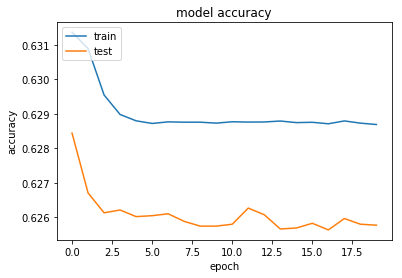

In [39]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

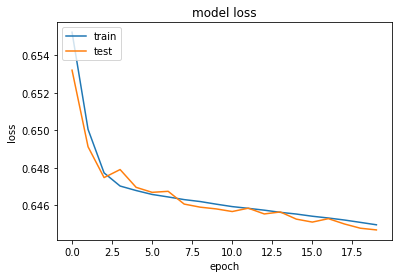

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
predictions = model.predict(X_test)
print('First prediction:', predictions)

First prediction: [[0.607256   0.39274395]
 [0.607256   0.39274395]
 [0.607256   0.39274395]
 ...
 [0.607256   0.39274395]
 [0.664825   0.33517498]
 [0.607256   0.39274395]]


In [ ]:
#KNN

In [ ]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [ ]:
nsamples1, nx1, ny1 = X_test.shape
X_test = X_test.reshape((nsamples1,nx1*ny1))


In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

In [ ]:
#Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model= RandomForestRegressor(n_estimators=1000)
# Train the model using the training sets and check score
model.fit(X,y)
#Predict Output

In [ ]:
predicted= model.predict(Y_test)